In [104]:
import numpy as np
from cv2 import imread,imwrite, dilate, erode
from cv2 import cvtColor, COLOR_BGR2HLS, calcHist
import cv2 as cv
import random
from matplotlib import pyplot as plt
from skimage.measure import label

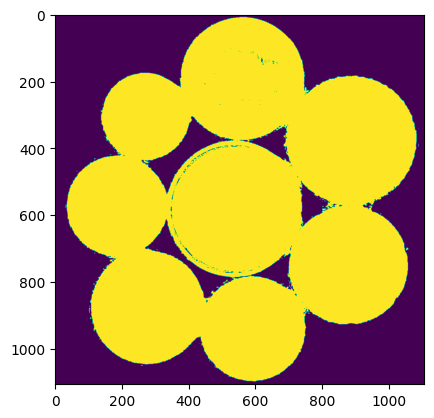

In [105]:
# read the image here C:\Fadri\Studium\3Jahr\6Semester\Bildverarbeitung\ue2\Bildverarbeitung\inputs\coins_seg.png with the absolute path
img = cv.imread('C:/Fadri/Studium/3Jahr/6Semester/Bildverarbeitung/ue2/Bildverarbeitung/inputs/coins_seg.png')[:, :, 0]

plt.imshow(img)


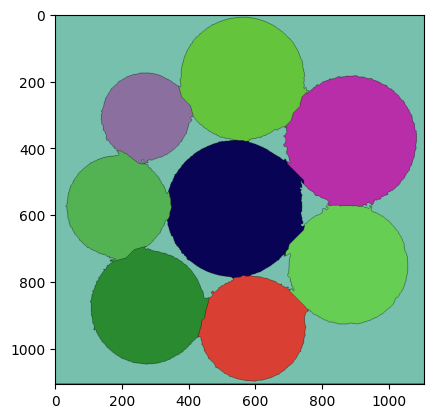

In [106]:

# Use distance transform and normalization
img = cv.medianBlur(img,3)
dist_transform = cv.distanceTransform(img,cv.DIST_L2,3)
_, sure_fg = cv.threshold(dist_transform,0.33*dist_transform.max(),255,0)

# Find sure background area
kernel = np.ones((3,3),np.uint8)
sure_bg = cv.dilate(img, kernel, iterations = 3)

# Subtract the sure foreground from the sure background
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

# Apply the watershed algorithm
img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
markers = cv.watershed(img,markers)

# Color boundaries in black
img[markers == -1] = [0,0,0]

# Create a random colormap
rand_color = lambda: (int(random.random()*255), int(random.random()*255), int(random.random()*255))
color_map = [rand_color() for _ in range(np.max(markers)+1)]

instance_seg_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
for i in range(markers.shape[0]):
    for j in range(markers.shape[1]):
        instance_seg_img[i,j] = color_map[markers[i,j]]
instance_seg_img[markers==-1] = [0,0,0]

plt.imshow(sure_fg, cmap='gray')
plt.imshow(instance_seg_img)

    